In [76]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

Data science salaries
https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary

# Import dataset and data preparation

In [13]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Drop redundant columns

In [ ]:
df = df.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)

In [22]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Check for missing values

In [24]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

# Visualisation of Salaries

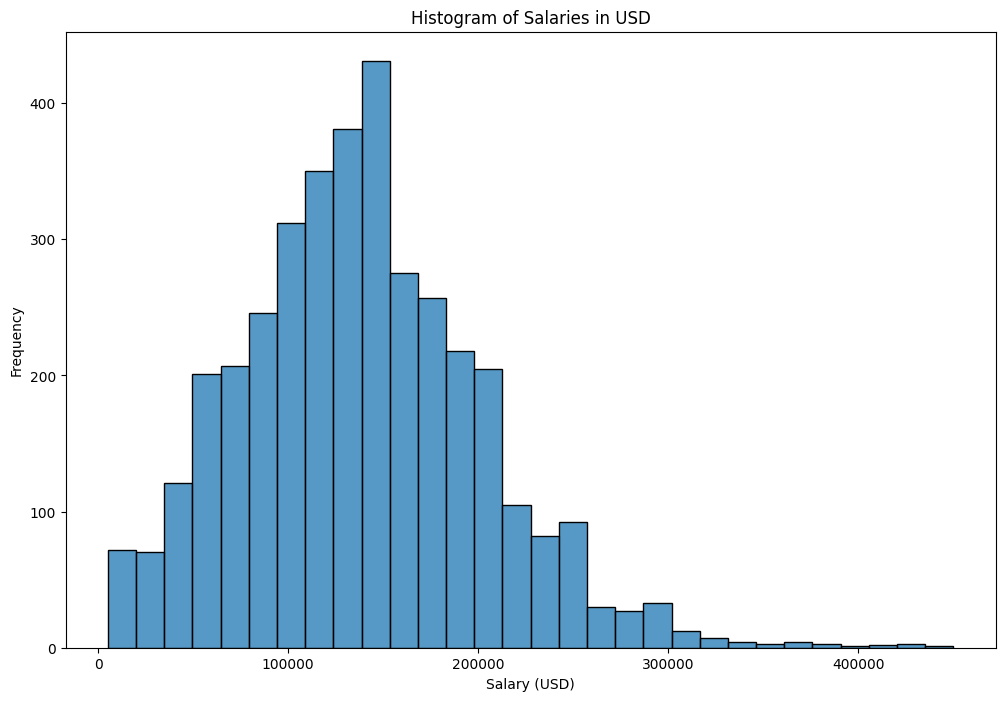

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(df['salary_in_usd'], bins=30)
plt.title('Histogram of Salaries in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

df['salary_in_usd'].describe()

# Effects of employment type on salaries

- PT > Part-time
- FT > Full-time
- CT > Contract
- FL > Freelance

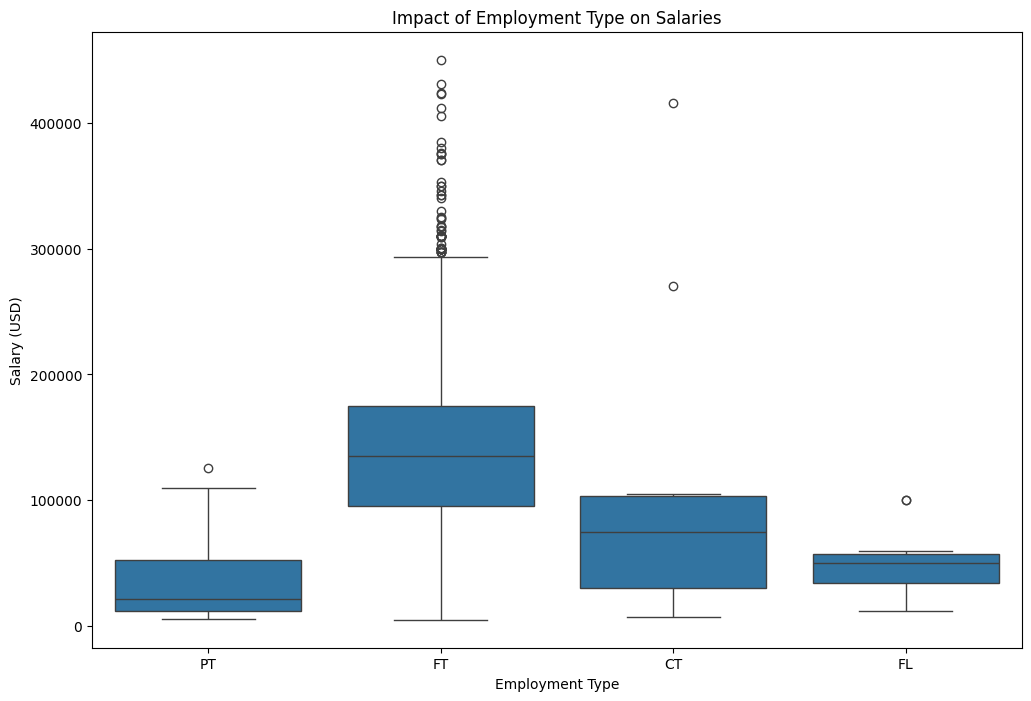

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, order=['PT', 'FT', 'CT', 'FL'])
plt.title('Effects of Employment Type on Salaries')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

Employment type in descending order of mean salaries: FT, CT, FL, PT

# Effects of experience levels on salaries

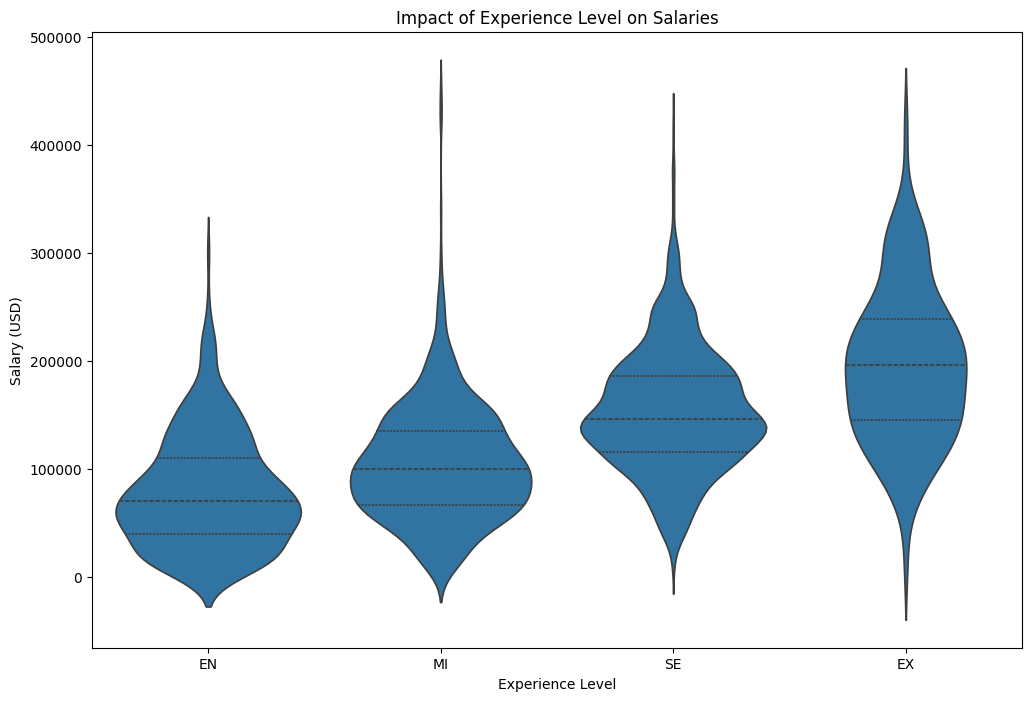

In [67]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'], inner= 'quartile')
plt.title('Impact of Experience Level on Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

# Effects of remote work on salary

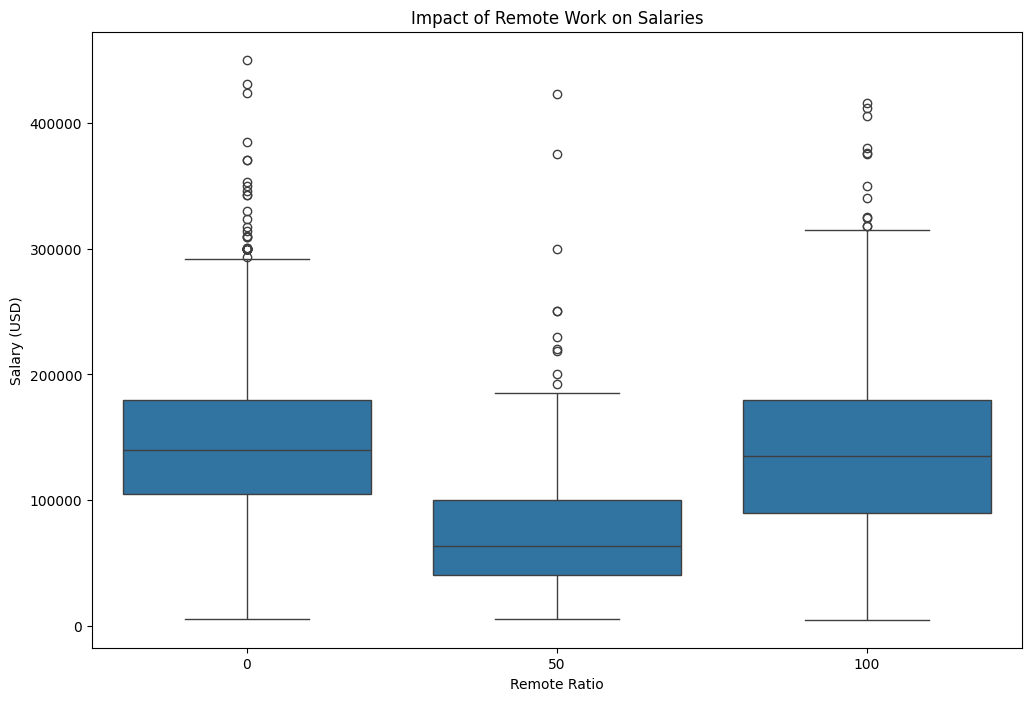

In [75]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Impact of Remote Work on Salaries')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.show()

In [52]:
# Calculate the correlation coeffccient between remote work ratio and salary
correlation = df['remote_ratio'].corr(df['salary_in_usd'])
print(f"Correlation between Remote Work Ratio and Salary: {correlation}")

Correlation between Remote Work Ratio and Salary: -0.06417098519057557


# Effects of company size on Salary

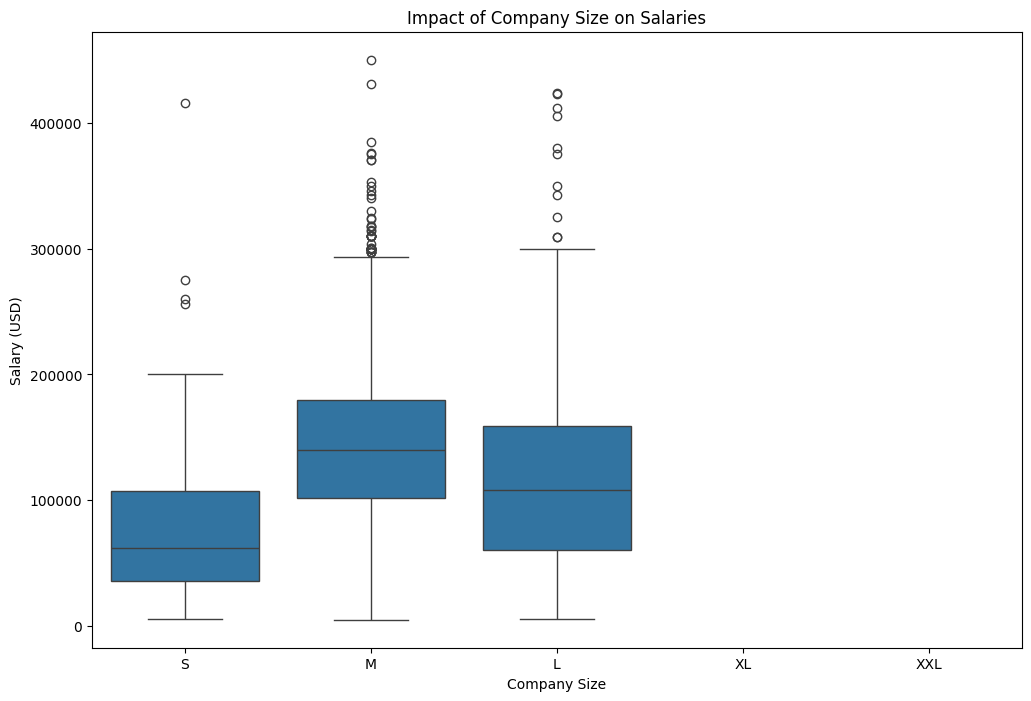

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L', 'XL', 'XXL'])
plt.title('Impact of Company Size on Salaries')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

# Top 10 jobs titles with highest median salary

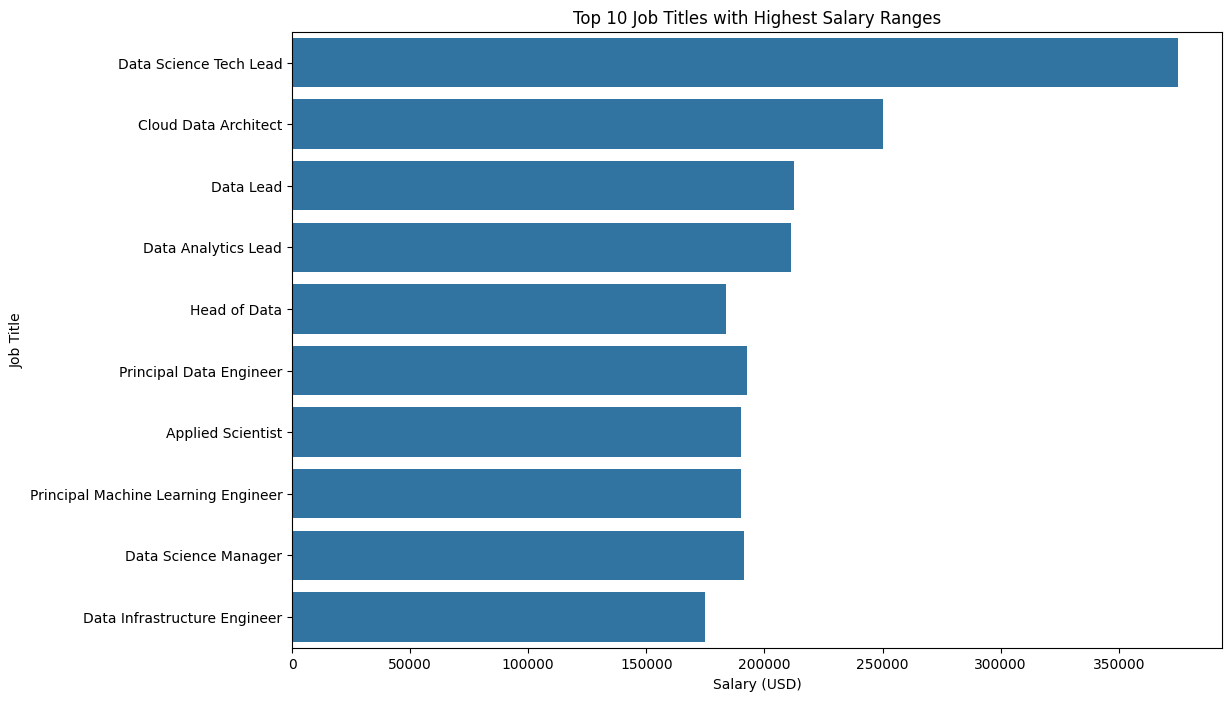

In [41]:
top_job_titles = df.groupby('job_title')['salary_in_usd'].median().nlargest(10).index
df_top_jobs = df[df['job_title'].isin(top_job_titles)]

# barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_jobs, errorbar=None, order=top_job_titles)
plt.title('Top 10 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()

# Top 10 job titles with highest median salary for entry level experience

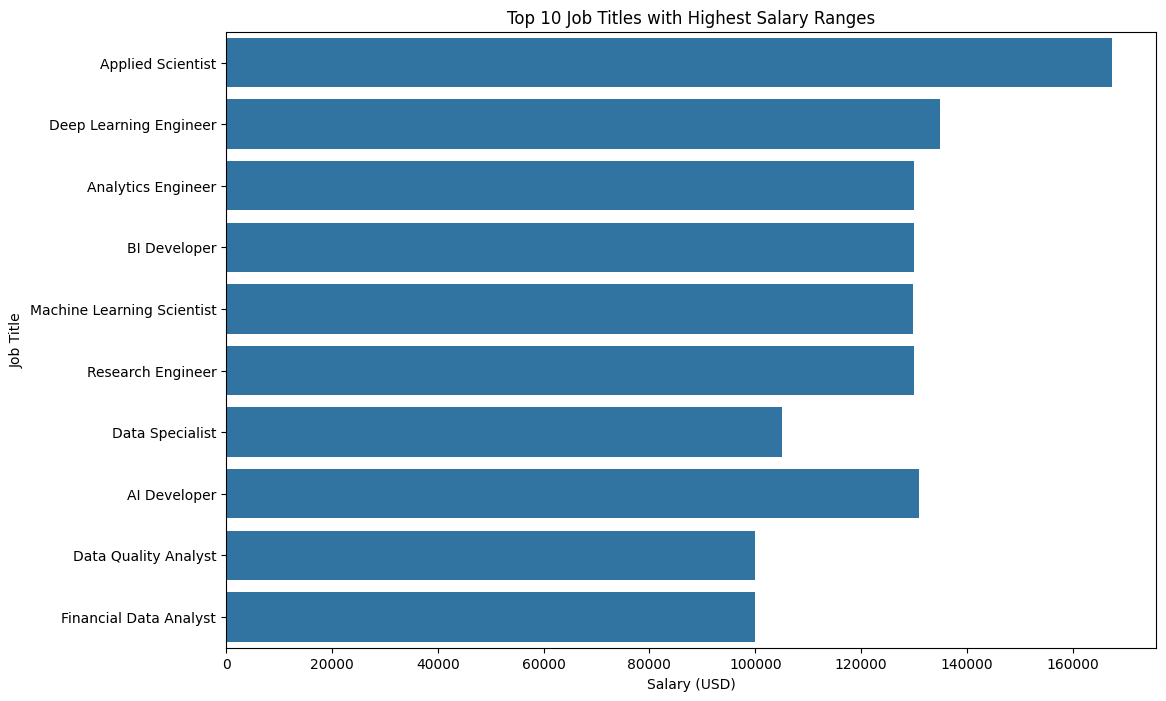

In [46]:
df_en = df.loc[df['experience_level'] == 'EN']
top_en_job_titles = df_en.groupby('job_title')['salary_in_usd'].median().nlargest(10).index
df_top_en_jobs = df_en[df_en['job_title'].isin(top_en_job_titles)]

# barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=df_top_en_jobs, errorbar=None, order=top_en_job_titles)
plt.title('Top 10 Job Titles with Highest Salary Ranges')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.show()